In [10]:
import pandas as pd
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import CSVLogger, EarlyStopping
from sklearn.model_selection import train_test_split # Only for spliting data
from sklearn import svm

# Neural Network

In [2]:
############# Read Data from the 5 components of PCA ############
# Import dataset
data = pd.read_csv("./data/reduced_pca_5.csv")

# Add label to the dataset, the first 36499 are electron neutrinos (-1 class) and the others 96565 are muon neutrinos (+1)
# Seperate neutrinos from electrons and muons
electron = data.head(36499)
muon = data.tail(96565)

del data

electron["neutrino"] = -1
muon["neutrino"] = 1

data = electron.append(muon)

del electron
del muon

# Splitting Train and test set
X = data.iloc[:,0:5].astype(float)
y = data["neutrino"]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

### 2. Defining Keras Model

In [3]:
# create model
model = Sequential()
model.add(Dense(60, input_dim=5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [4]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', weighted_metrics=['accuracy'], metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [6]:
csv_logger = CSVLogger('./results/log_simple_neural_net.csv', append=True, separator=';')
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [7]:
epochs = 120
class_weight = {0 : 3 , 1: 1}
history = model.fit(X, encoded_Y , epochs=epochs, batch_size =256, class_weight=class_weight, validation_split=0.1, callbacks=[csv_logger])

Epoch 1/120
468/468 [==============================] - 2s 5ms/step - loss: 0.9254 - accuracy: 0.6399 - weighted_accuracy: 0.7212 - val_loss: 0.5494 - val_accuracy: 0.7999 - val_weighted_accuracy: 0.7999
Epoch 2/120
468/468 [==============================] - 3s 6ms/step - loss: 0.7489 - accuracy: 0.7875 - weighted_accuracy: 0.7881 - val_loss: 0.5246 - val_accuracy: 0.7809 - val_weighted_accuracy: 0.7809
Epoch 3/120
468/468 [==============================] - 2s 5ms/step - loss: 0.7162 - accuracy: 0.7884 - weighted_accuracy: 0.7972 - val_loss: 0.4815 - val_accuracy: 0.7914 - val_weighted_accuracy: 0.7914
Epoch 4/120
468/468 [==============================] - 2s 5ms/step - loss: 0.6938 - accuracy: 0.7881 - weighted_accuracy: 0.8044 - val_loss: 0.4643 - val_accuracy: 0.7849 - val_weighted_accuracy: 0.7849
Epoch 5/120
468/468 [==============================] - 2s 5ms/step - loss: 0.6777 - accuracy: 0.7896 - weighted_accuracy: 0.8108 - val_loss: 0.4885 - val_accuracy: 0.7632 - val_weighted_ac

### 3. Plotting History

In [8]:
import matplotlib.pyplot as plt

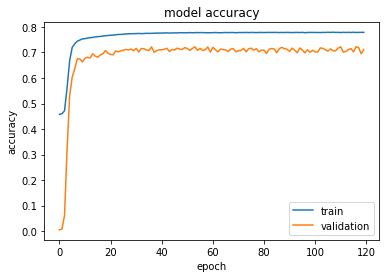

In [11]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

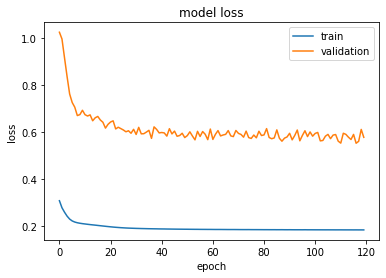

In [13]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# SVM

In [9]:
############# Read Data from the 5 components of PCA ############
# Import dataset
data = pd.read_csv("./data/reduced_pca_5.csv")

# Add label to the dataset, the first 36499 are electron neutrinos (-1 class) and the others 96565 are muon neutrinos (+1)
# Seperate neutrinos from electrons and muons
electron = data.head(36499)
muon = data.tail(96565)

del data

electron["neutrino"] = -1
muon["neutrino"] = 1

data = electron.append(muon)

del electron
del muon

############## Splitting Train and test set
X = data.iloc[:,0:5]
y = data["neutrino"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Convert to numpy array
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

### 1.Linear Classifier

In [11]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

In [12]:
# Fit the model
clf = clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)